# Simple example of GD

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Dimension 1

Simple linear model: $y = w x$,
with $w,x \in \mathbb{R}$.

In [2]:
true_w = 1
xs = np.random.uniform(0, 1, 100)
ys = true_w * xs + np.random.normal(0, 0.2, 100)

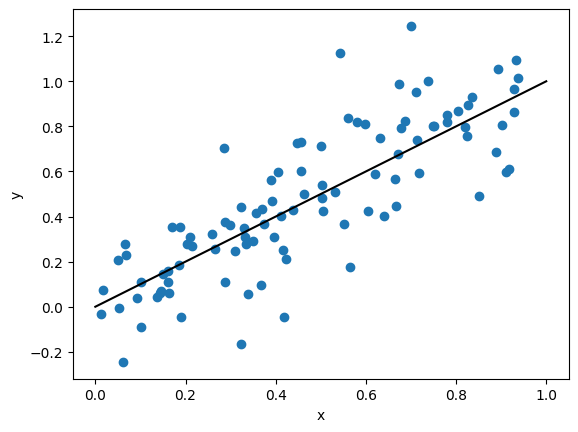

In [3]:
plt.scatter(xs, ys)
plt.plot([0,1], [0,1], "black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Mean Squared Error:
$$ MSE(w) = \frac{1}{n} \sum_{i=1}^{n} (w x_i - y_i)^2$$

In [4]:
def MSE(w):
    return ((w * xs - ys) ** 2).mean()

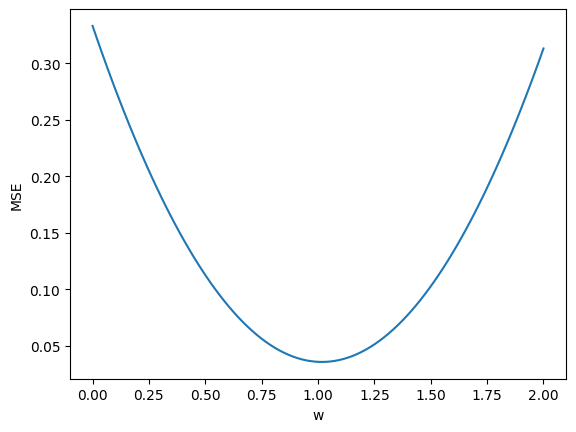

In [5]:
w_values = np.linspace(0,2,100)
plt.plot(w_values, [MSE(w) for w in w_values])
plt.xlabel("w")
plt.ylabel("MSE")
plt.show()

In [6]:
def gradient(w):
    return (2 * (w * xs - ys) * xs).mean()

In [7]:
L = 2 * (xs ** 2).mean()
1/L

1.738950440738459

In [8]:
ALPHA = 0.5
MAX_ITER = 100
EPSILON = 1e-10
w_0 = 0

In [9]:
w_iterates = [w_0]
while np.abs(gradient(w_iterates[-1])) > EPSILON and len(w_iterates) < MAX_ITER:
    grad = gradient(w_iterates[-1])
    new_w = w_iterates[-1] - ALPHA * grad
    w_iterates.append(new_w)
    print(f"w: {new_w:.4f}, \t MSE: {MSE(new_w):.4f}")

w: 0.2925, 	 MSE: 0.1866
w: 0.5009, 	 MSE: 0.1122
w: 0.6494, 	 MSE: 0.0744
w: 0.7552, 	 MSE: 0.0553
w: 0.8306, 	 MSE: 0.0455
w: 0.8843, 	 MSE: 0.0406
w: 0.9226, 	 MSE: 0.0381
w: 0.9498, 	 MSE: 0.0368
w: 0.9692, 	 MSE: 0.0362
w: 0.9831, 	 MSE: 0.0359
w: 0.9929, 	 MSE: 0.0357
w: 1.0000, 	 MSE: 0.0356
w: 1.0050, 	 MSE: 0.0356
w: 1.0085, 	 MSE: 0.0355
w: 1.0111, 	 MSE: 0.0355
w: 1.0129, 	 MSE: 0.0355
w: 1.0142, 	 MSE: 0.0355
w: 1.0151, 	 MSE: 0.0355
w: 1.0157, 	 MSE: 0.0355
w: 1.0162, 	 MSE: 0.0355
w: 1.0165, 	 MSE: 0.0355
w: 1.0168, 	 MSE: 0.0355
w: 1.0170, 	 MSE: 0.0355
w: 1.0171, 	 MSE: 0.0355
w: 1.0172, 	 MSE: 0.0355
w: 1.0172, 	 MSE: 0.0355
w: 1.0173, 	 MSE: 0.0355
w: 1.0173, 	 MSE: 0.0355
w: 1.0173, 	 MSE: 0.0355
w: 1.0173, 	 MSE: 0.0355
w: 1.0173, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355
w: 1.0174, 	 MSE: 0.0355


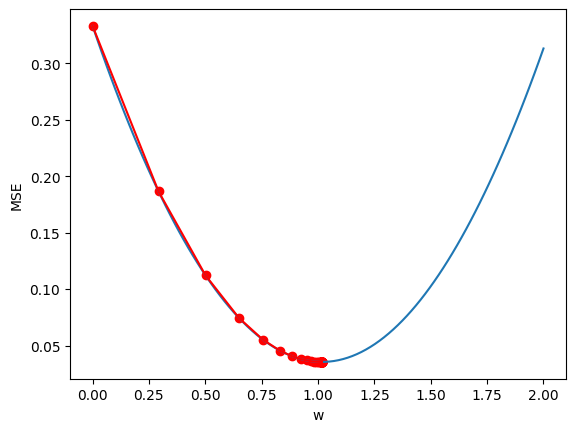

In [10]:
plt.plot(w_values, [MSE(w) for w in w_values])
plt.scatter(w_iterates, [MSE(w) for w in w_iterates], color="red")
plt.plot(w_iterates, [MSE(w) for w in w_iterates], color="red")
plt.xlabel("w")
plt.ylabel("MSE")
plt.show()

## 2d case

$y = w_1 x_1 + w_2 x_2 = w^T x$

In [11]:
true_w = np.array([-1,2])
xs = np.random.uniform(0, 1, (2,500))
ys = true_w @ xs + np.random.normal(0, 0.4, 500)

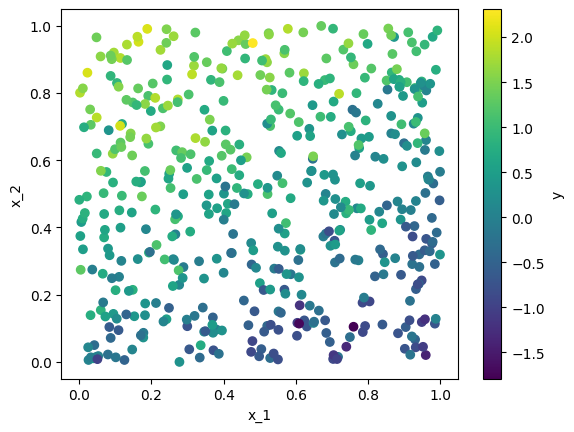

In [12]:
plt.scatter(xs[0,:], xs[1,:], c=ys)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.colorbar(label="y")
plt.show()

In [13]:
def MSE(w):
    return ((w @ xs - ys) ** 2).mean()

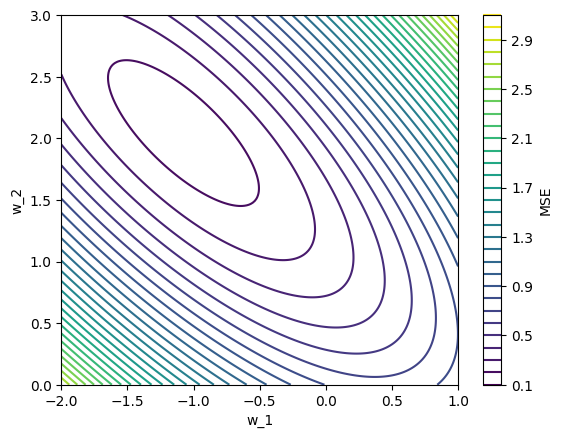

In [14]:
w1_values = np.linspace(-2,1,200)
w2_values = np.linspace(0,3,200)
mse_vals = np.zeros((200,200))
for i in range(200):
    for j in range(200):
        mse_vals[j,i] = MSE(np.array([w1_values[i], w2_values[j]]))

plt.contour(w1_values, w2_values, mse_vals, levels=30)
plt.xlabel("w_1")
plt.ylabel("w_2")
plt.colorbar(label="MSE")
plt.show()

In [15]:
def gradient(w):
    return (2 * (w @ xs - ys) * xs).mean(axis=1)

In [16]:
ALPHA = 1.5
MAX_ITER = 100
EPSILON = 1e-10
w_0 = np.array([0,0])

In [17]:
w_iterates = [w_0]
while np.linalg.norm(gradient(w_iterates[-1])) > EPSILON and len(w_iterates) < MAX_ITER:
    grad = gradient(w_iterates[-1])
    new_w = w_iterates[-1] - ALPHA * grad
    w_iterates.append(new_w)
    print(f"w: {new_w}, \t MSE: {MSE(new_w):.4f}")

w: [0.44211084 1.18186332], 	 MSE: 0.5347
w: [-0.50246324  0.85358522], 	 MSE: 0.3798
w: [-0.18908694  1.58246784], 	 MSE: 0.2880
w: [-0.77415507  1.34841509], 	 MSE: 0.2333
w: [-0.55621308  1.79949946], 	 MSE: 0.2007
w: [-0.91978469  1.63602495], 	 MSE: 0.1811
w: [-0.77036033  1.91611088], 	 MSE: 0.1693
w: [-0.99698333  1.80366474], 	 MSE: 0.1621
w: [-0.89565781  1.97811698], 	 MSE: 0.1578
w: [-1.037323    1.90167278], 	 MSE: 0.1551
w: [-0.96920859  2.01064825], 	 MSE: 0.1535
w: [-1.05800204  1.95915598], 	 MSE: 0.1525
w: [-1.01253227  2.02741522], 	 MSE: 0.1519
w: [-1.06832413  1.99298536], 	 MSE: 0.1515
w: [-1.03814332  2.03584891], 	 MSE: 0.1513
w: [-1.07327901  2.01296529], 	 MSE: 0.1512
w: [-1.05334029  2.03994415], 	 MSE: 0.1511
w: [-1.07551364  2.0248095 ], 	 MSE: 0.1510
w: [-1.06239275  2.04182658], 	 MSE: 0.1510
w: [-1.07641251  2.03185783], 	 MSE: 0.1509
w: [-1.06780649  2.04261239], 	 MSE: 0.1509
w: [-1.07668627  2.03606877], 	 MSE: 0.1509
w: [-1.07105721  2.04287756], 	 MS

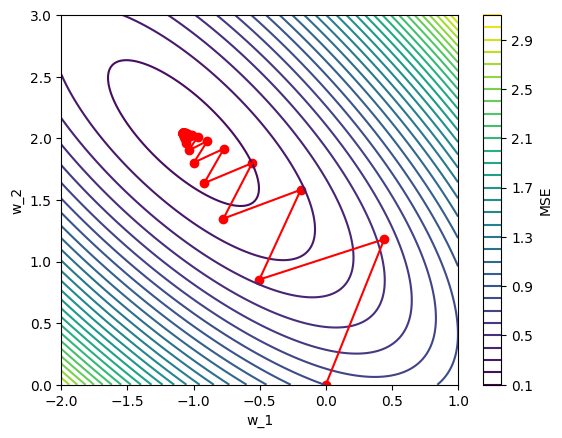

In [18]:
plt.contour(w1_values, w2_values, mse_vals, levels=30)
plt.colorbar(label="MSE")
plt.scatter([w[0] for w in w_iterates], [w[1] for w in w_iterates], color="red")
plt.plot([w[0] for w in w_iterates], [w[1] for w in w_iterates], color="red")
plt.xlabel("w_1")
plt.ylabel("w_2")
plt.show()

## Cyclic Coordinate GD

In [19]:
def partial_derivative(w, i):
    return (2 * (w @ xs - ys) * xs[i,:]).mean()

In [20]:
ALPHA = 1.5
MAX_ITER = 200
EPSILON = 1e-10
w_0 = np.array([0,0])

In [21]:
w_iterates = [w_0]
while np.linalg.norm(gradient(w_iterates[-1])) > EPSILON and len(w_iterates) < MAX_ITER:
    # coordinate w_1
    pd_1 = partial_derivative(w_iterates[-1], 0)
    intermediate_w = w_iterates[-1] - ALPHA * np.array([pd_1, 0])
    # coordinate w_2
    pd_2 = partial_derivative(intermediate_w, 1)
    new_w = intermediate_w - ALPHA * np.array([0, pd_2])

    w_iterates.append(intermediate_w)
    w_iterates.append(new_w)

    print(f"w: {new_w}, \t MSE: {MSE(new_w):.4f}")

w: [0.44211084 0.83878315], 	 MSE: 0.4984
w: [-0.23623135  1.37568521], 	 MSE: 0.2572
w: [-0.61076443  1.67304906], 	 MSE: 0.1835
w: [-0.81827249  1.83780062], 	 MSE: 0.1609
w: [-0.93324022  1.92907955], 	 MSE: 0.1540
w: [-0.99693693  1.97965171], 	 MSE: 0.1518
w: [-1.03222744  2.0076707 ], 	 MSE: 0.1512
w: [-1.05177979  2.02319434], 	 MSE: 0.1510
w: [-1.06261257  2.03179506], 	 MSE: 0.1509
w: [-1.06861436  2.03656019], 	 MSE: 0.1509
w: [-1.07193959  2.03920027], 	 MSE: 0.1509
w: [-1.0737819   2.04066298], 	 MSE: 0.1509
w: [-1.07480261  2.04147338], 	 MSE: 0.1509
w: [-1.07536813  2.04192237], 	 MSE: 0.1509
w: [-1.07568145  2.04217113], 	 MSE: 0.1509
w: [-1.07585504  2.04230895], 	 MSE: 0.1509
w: [-1.07595122  2.04238531], 	 MSE: 0.1509
w: [-1.0760045   2.04242762], 	 MSE: 0.1509
w: [-1.07603402  2.04245106], 	 MSE: 0.1509
w: [-1.07605038  2.04246404], 	 MSE: 0.1509
w: [-1.07605944  2.04247124], 	 MSE: 0.1509
w: [-1.07606446  2.04247522], 	 MSE: 0.1509
w: [-1.07606724  2.04247743], 	 MS

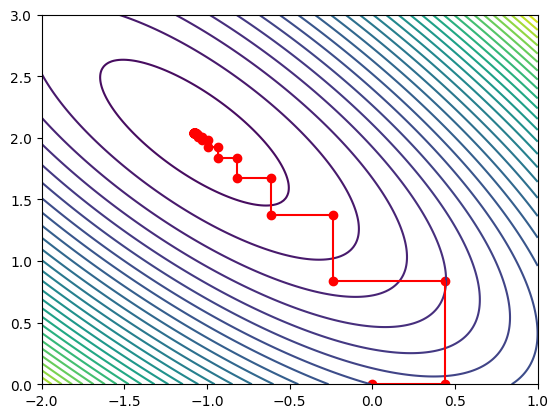

In [22]:
plt.contour(w1_values, w2_values, mse_vals, levels=30)
plt.scatter([w[0] for w in w_iterates], [w[1] for w in w_iterates], color="red")
plt.plot([w[0] for w in w_iterates], [w[1] for w in w_iterates], color="red")
plt.show()